In [2]:
import os
from pathlib import Path

import aps_ai
from aps_ai.common.simulation.facade.source_factory import Implementors, source_factory_method
from aps_ai.common.simulation.facade.source_interface import Sources, StorageRing
from aps_ai.common.util import clean_up
from aps_ai.common.util.shadow.common import (
    get_shadow_beam_spatial_distribution,
    plot_shadow_beam_divergence_distribution,
    plot_shadow_beam_spatial_distribution,
    save_source_beam,
)

In [3]:
%matplotlib inline

In [4]:
root_dir = Path(aps_ai.__file__).parents[1]
print(root_dir)
work_dir = root_dir / 'work_directory/34-ID'
print(work_dir, work_dir.exists())

/Users/skandel/code/oasys/AI-ML_Control_System
/Users/skandel/code/oasys/AI-ML_Control_System/work_directory/34-ID True


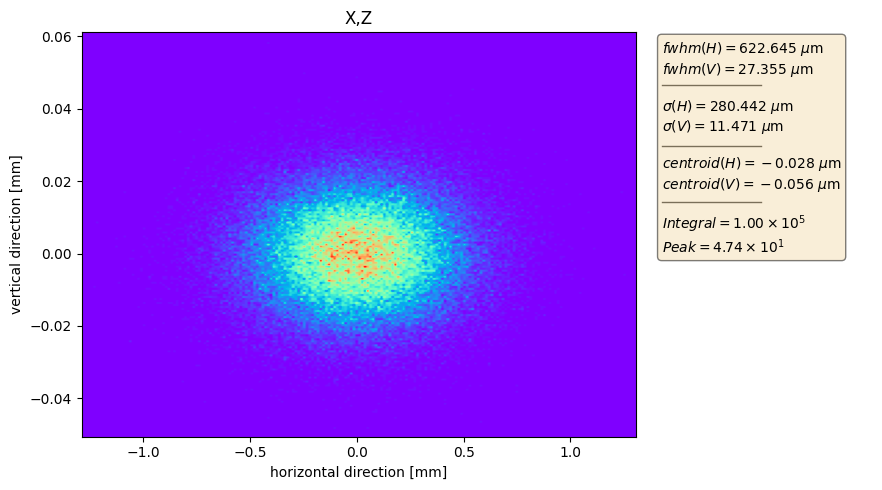

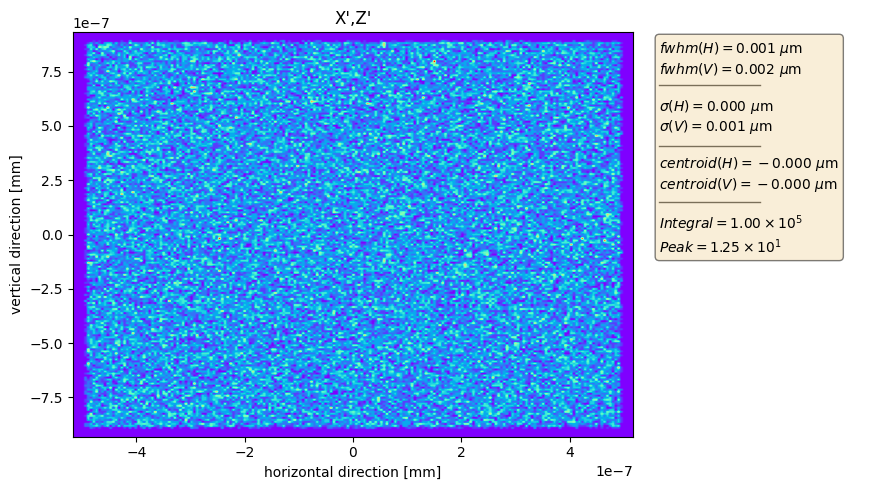

In [5]:
verbose = False

os.chdir(work_dir)

clean_up()

source = source_factory_method(implementor=Implementors.SHADOW, kind_of_source=Sources.GAUSSIAN)
source.initialize(n_rays=100000, random_seed=3245345, storage_ring=StorageRing.APS)

source.set_angular_acceptance_from_aperture(aperture=[0.05, 0.09], distance=50500)
source.set_energy(energy_range=[4999.0, 5001.0], photon_energy_distribution=source.PhotonEnergyDistributions.UNIFORM)

source_beam = source.get_source_beam(verbose=verbose)

save_source_beam(source_beam, "gaussian_undulator_source.dat")

plot_shadow_beam_spatial_distribution(source_beam)

plot_shadow_beam_divergence_distribution(source_beam)

'''
source = source_factory_method(implementor=Implementors.SHADOW, kind_of_source=Sources.UNDULATOR)
source.initialize(n_rays=50000, random_seed=3245345, verbose=True, storage_ring=StorageRing.APS)

source.set_angular_acceptance_from_aperture(aperture=[2, 2], distance=25000)
source.set_K_on_specific_harmonic(harmonic_energy=6000, harmonic_number=1, which=source.KDirection.VERTICAL)
source.set_energy(photon_energy_distribution=source.PhotonEnergyDistributions.ON_HARMONIC, harmonic_number=1)

plot_shadow_beam_spatial_distribution(source.get_source_beam(ignore_aperture=True), xrange=[-1, 1], yrange=[-0.05, 0.05])
plot_shadow_beam_spatial_distribution(source.get_source_beam(), xrange=[-1, 1], yrange=[-0.05, 0.05])
'''

shadow_histogram = get_shadow_beam_spatial_distribution(source_beam, xrange=[-1, 1], yrange=[-0.05, 0.05])

clean_up()